In [7]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


               연평균기온      최고기온      최저기온   상대습도(%)   강수량(mm)      온도차이  \
연평균기온       1.000000  0.747771  0.983536  0.117127  0.372670 -0.875090   
최고기온        0.747771  1.000000  0.620819  0.055352  0.365286 -0.335867   
최저기온        0.983536  0.620819  1.000000  0.124655  0.316789 -0.946926   
상대습도(%)     0.117127  0.055352  0.124655  1.000000 -0.104200 -0.127075   
강수량(mm)     0.372670  0.365286  0.316789 -0.104200  1.000000 -0.230837   
온도차이       -0.875090 -0.335867 -0.946926 -0.127075 -0.230837  1.000000   
밤 (kg)      0.111107  0.211876  0.064611  0.042504  0.299485  0.009249   
복분자딸기 (kg)  0.063790  0.241200  0.014064  0.172084  0.121906  0.082003   
오갈피 (kg)    0.686099  0.417135  0.697506 -0.224439  0.580551 -0.667002   
더덕 (kg)     0.798084  0.486837  0.807586 -0.253119  0.519392 -0.770682   
생표고 (kg)   -0.170265 -0.312772 -0.105093 -0.054384 -0.209787 -0.001981   

              밤 (kg)  복분자딸기 (kg)  오갈피 (kg)   더덕 (kg)  생표고 (kg)  
연평균기온       0.111107    0.063790  0.686099  0.

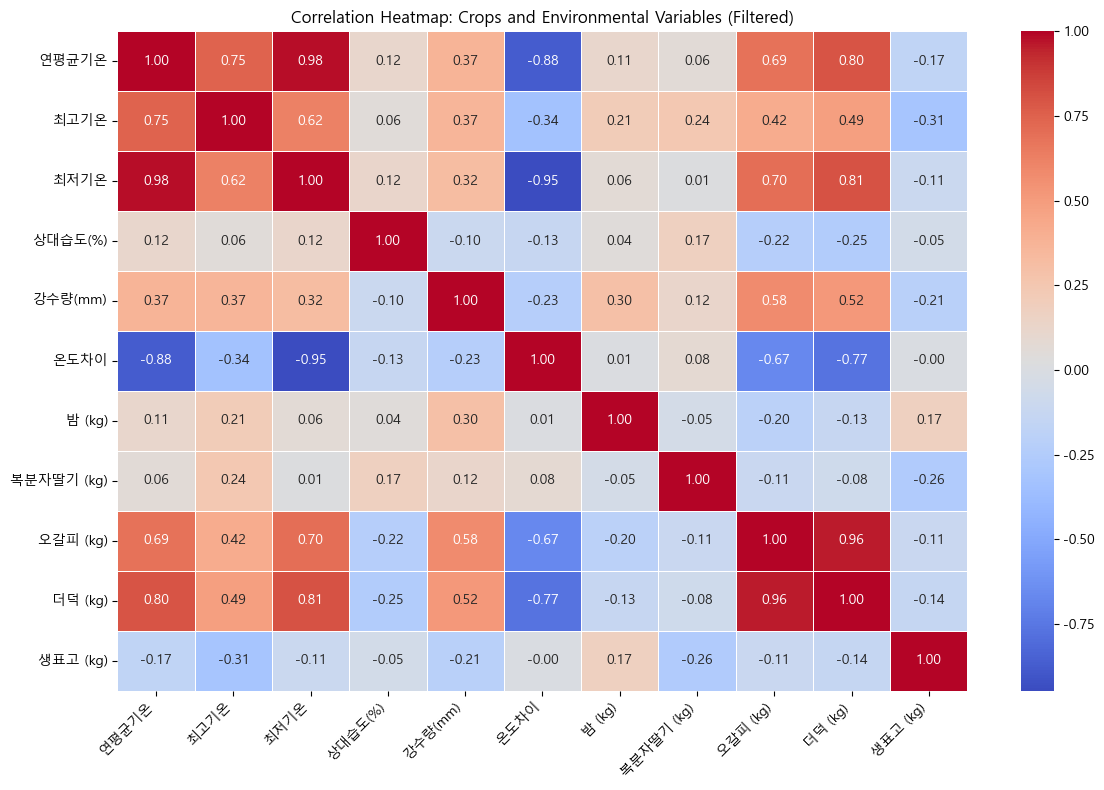

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = "C:/Users/user/Desktop/진짜임 이게 찐.csv"  
data = pd.read_csv(file_path)

# 온도차이 계산
data['온도차이'] = data['최고기온'] - data['최저기온']

# 농작물 및 독립 변수 목록
crops = ["밤 (kg)", "복분자딸기 (kg)", "오갈피 (kg)", "더덕 (kg)", "생표고 (kg)"]
independent_vars = ["연평균기온", "최고기온", "최저기온", "상대습도(%)", "강수량(mm)", "온도차이"]

# 농작물 생산량이 0보다 큰 데이터 필터링
filtered_data = data[(data[crops] > 0).all(axis=1)].copy()

# 결측치 처리
variables = independent_vars + crops
filtered_data[variables] = filtered_data[variables].fillna(filtered_data[variables].mean())

# 상관관계 행렬 계산
filtered_correlation_matrix = filtered_data[variables].corr()

# 상관관계 행렬 출력 (디버깅용)
print(filtered_correlation_matrix)

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(filtered_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Crops and Environmental Variables (Filtered)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [5]:
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

data['토양형코드'] = data['토양형코드'].astype('object')
data['토성코드'] = data['토성코드'].astype('object')
data['토양유효수분량'] = data['토양유효수분량'].astype('object')
soild_independent_vars=["토양형코드", "토성코드", "토양유효수분량"]
soild_independent_vars2=pd.get_dummies(data[soild_independent_vars],dtype=int)
soild_independent_vars2

,토양형코드_1,토양형코드_2,토양형코드_3,토양형코드_4,토양형코드_5,토양형코드_6,토양형코드_7,토양형코드_9,토양형코드_12,토양형코드_14,토성코드_1,토성코드_2,토성코드_3,토성코드_4,토양유효수분량_1.0,토양유효수분량_2.0,토양유효수분량_3.0,토양유효수분량_4.0,토양유효수분량_5.0
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
173,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
174,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
175,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [6]:
pip install statsmodels --upgrade

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
    --------------------------------------- 0.2/9.8 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/9.8 MB 5.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.8 MB 6.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.8 MB 7.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.8 MB 8.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.8 MB 8.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.6/9.8 MB 7.3 MB/s eta 0:00:01
   ------------ --------------------------- 3.1/9.8 MB 7.6 MB/s eta 0:00:01
   -------------- ------------------------- 3.6/9.8 MB 8.0 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.8 MB 8.3 MB/s eta 0:00:01
   ------------------- ----------

In [11]:
soild_independent_vars=["토양형코드", "토성코드", "토양유효수분량"]
data[soild_independent_vars]=pd.Categorical(data[soild_independent_vars]).codes
categories = data[soild_independent_vars].unique()
means = data.groupby(soild_independent_vars)[crops].mean()
stds = data.groupby(soild_independent_vars)[crops].std()

# Polyserial correlation을 대체할 수 있는 Pearson correlation 계산
correlation, p_value = stats.pearsonr(data[soild_independent_vars2], df[crops])

# 결과 출력
print(f'Correlation: {correlation}, P-value: {p_value}')

# 각 범주에 대한 평균과 표준편차 출력
print("\nMeans:\n", means)
print("\nStandard Deviations:\n", stds)

AttributeError: 'DataFrame' object has no attribute 'unique'

In [24]:
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestRegressor
import pandas as pd



anova_results = {}
for soil_var in ["토양형코드", "토성코드", "토양유효수분량"]:
    anova_results[soil_var] = {}
    for crop in crops:
        try:
            # Perform ANOVA
            anova = f_oneway(*[data[data[soil_var] == cat][crop] for cat in data[soil_var].dropna().unique()])
            anova_results[soil_var][crop] = {
                "p-value": anova.pvalue,
                "statistic": anova.statistic
            }
        except ValueError:  # Handle cases with insufficient data
            anova_results[soil_var][crop] = {
                "p-value": None,
                "statistic": None
            }

rf_results = {}


for crop in crops:
    X = data[independent_vars]
    y = data[crop]
    X = X.fillna(X.mean())
    y = y.fillna(y.mean())

    rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
    rf_model.fit(X, y)

    feature_importances = dict(zip(X.columns, rf_model.feature_importances_))
    rf_results[crop] = feature_importances

anova_pvalues_df = pd.DataFrame.from_dict(
    {soil_var: {crop: res["p-value"] for crop, res in crops_dict.items()}
     for soil_var, crops_dict in anova_results.items()}
)

rf_importances_df = pd.DataFrame(rf_results)

print("=== ANOVA Results (p-values) ===")
print(anova_pvalues_df)

print("\n=== Random Forest Feature Importances ===")
print(rf_importances_df)


=== ANOVA Results (p-values) ===
               토양형코드      토성코드       토양유효수분량
밤 (kg)      0.543478  0.156010  4.833370e-01
복분자딸기 (kg)  0.258828  0.652871  4.367170e-40
오갈피 (kg)    0.956678  0.647241  7.925455e-01
더덕 (kg)     0.176109  0.034274  6.251360e-01
생표고 (kg)    0.959371  0.412753  1.527171e-01

=== Random Forest Feature Importances ===
           밤 (kg)  복분자딸기 (kg)  오갈피 (kg)   더덕 (kg)  생표고 (kg)
연평균기온    0.070204    0.149042  0.236626  0.324994  0.098480
최고기온     0.123310    0.134514  0.035979  0.042710  0.122457
최저기온     0.141200    0.113425  0.447352  0.240401  0.115852
상대습도(%)  0.305431    0.352615  0.065829  0.085538  0.341208
강수량(mm)  0.209203    0.157008  0.104043  0.046991  0.237384
온도차이     0.150651    0.093397  0.110170  0.259367  0.084618


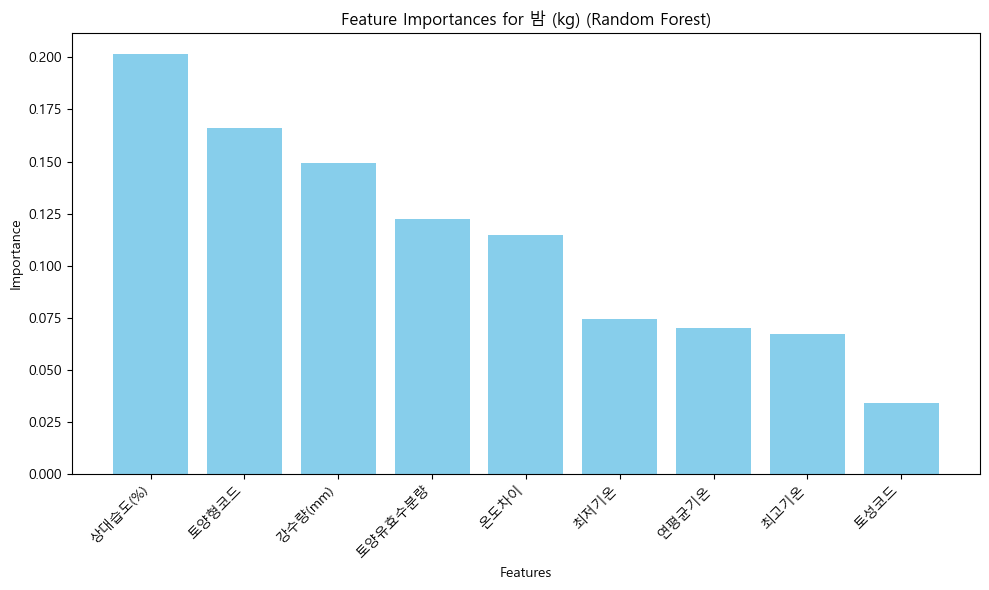

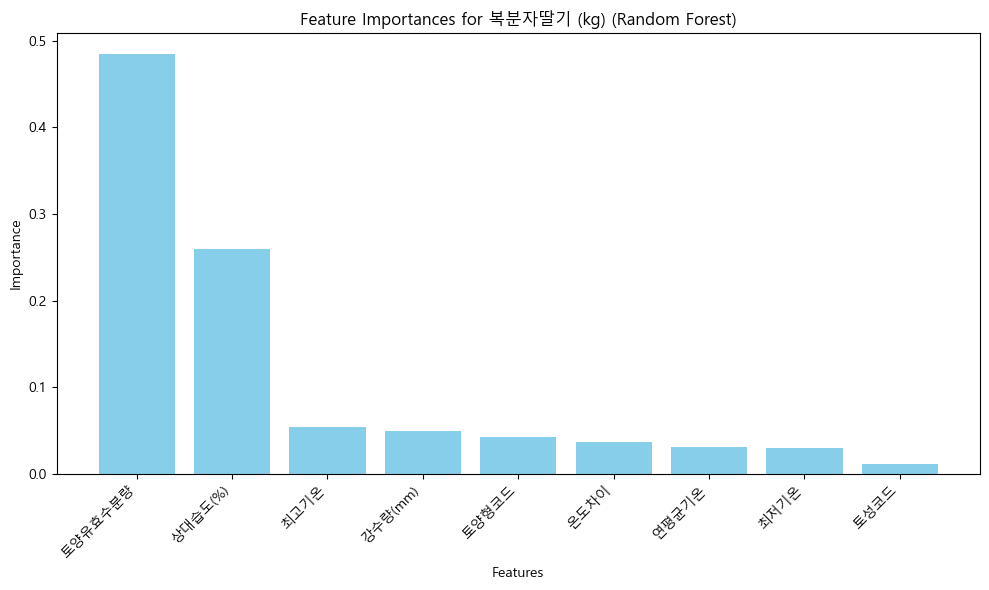

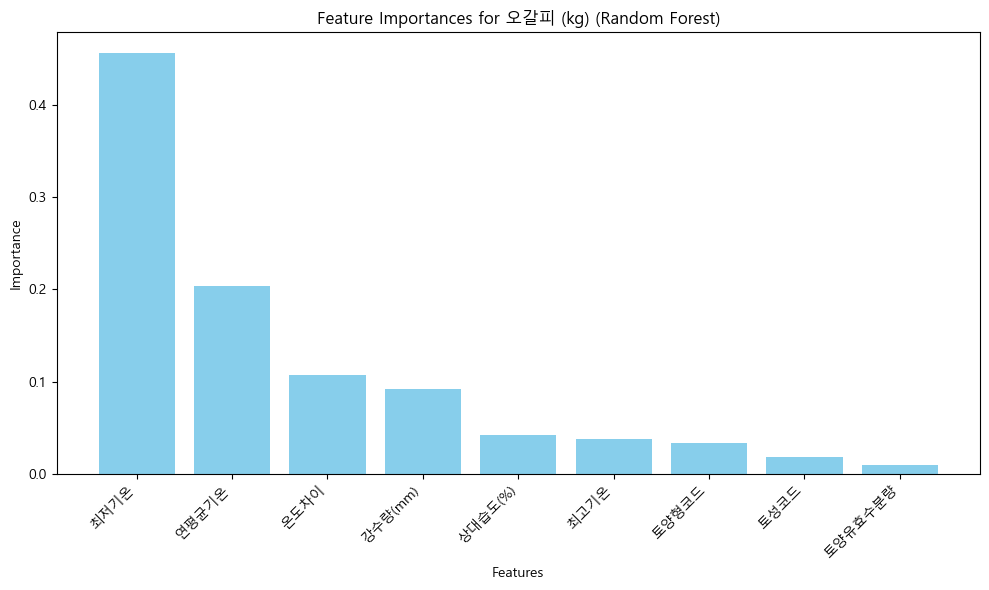

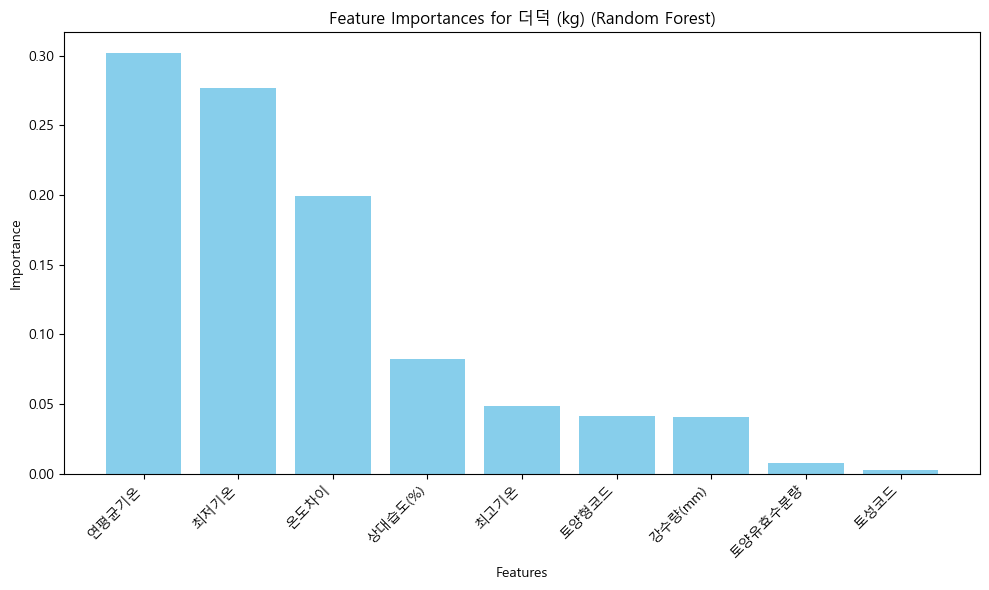

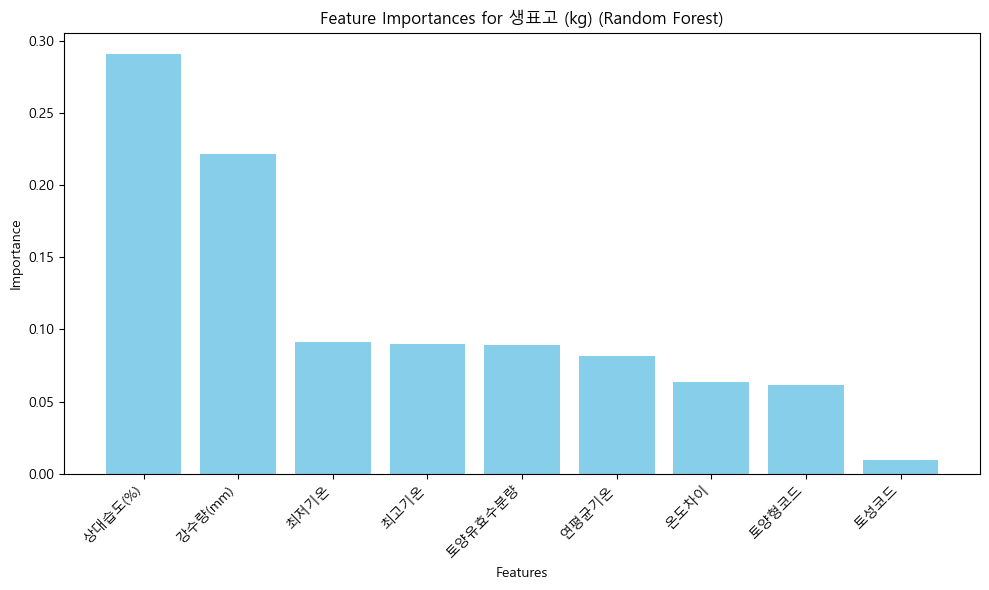

In [10]:
import matplotlib.pyplot as plt

# Visualize Random Forest Feature Importances for each crop
for crop, importances in rf_results.items():
    # Sort feature importances in descending order
    sorted_importances = dict(sorted(importances.items(), key=lambda item: item[1], reverse=True))
    
    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.rcParams['font.family'] ='Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] =False
    plt.bar(sorted_importances.keys(), sorted_importances.values(), color='skyblue')
    plt.title(f'Feature Importances for {crop} (Random Forest)')
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


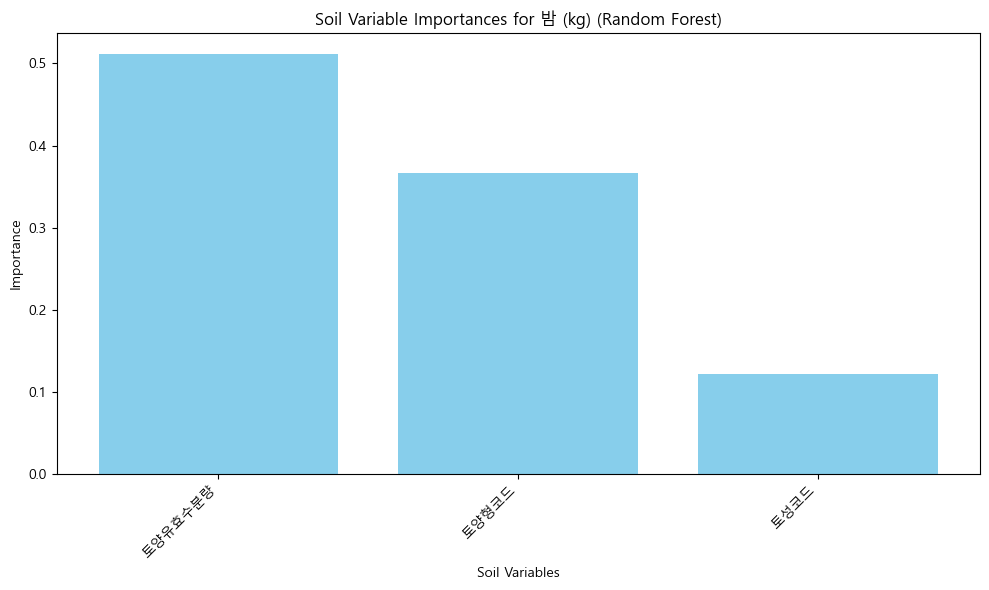

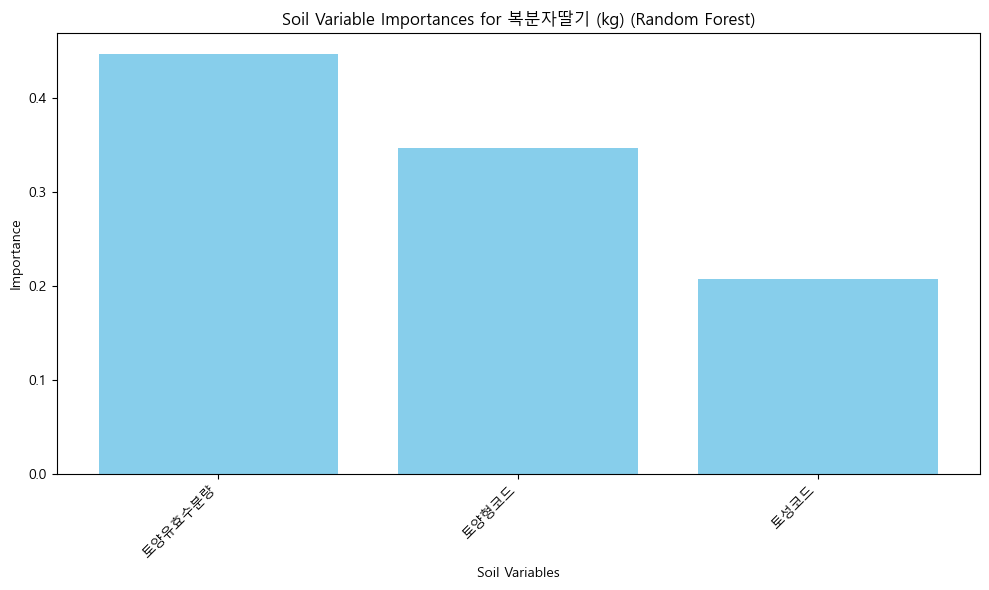

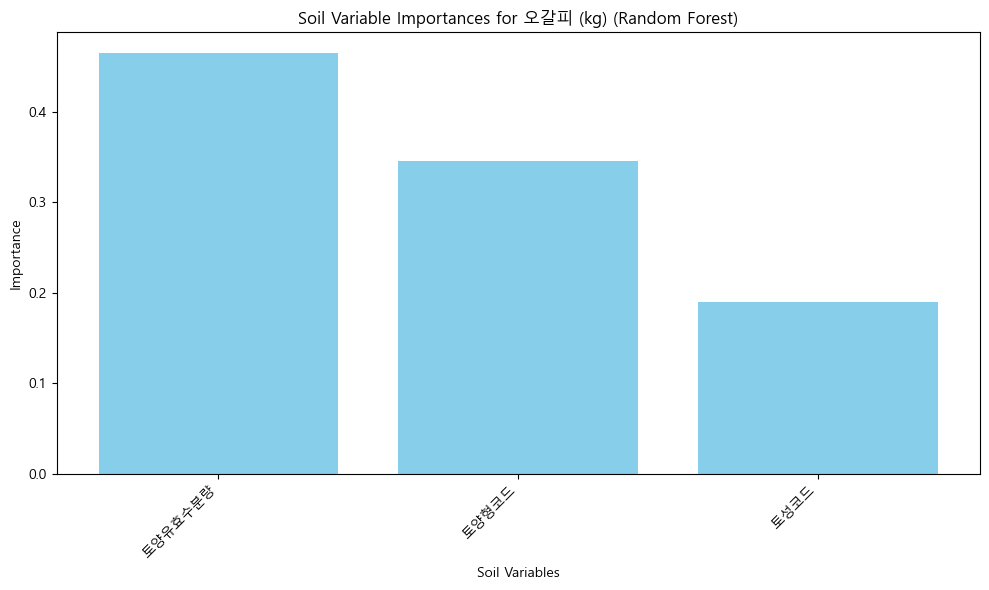

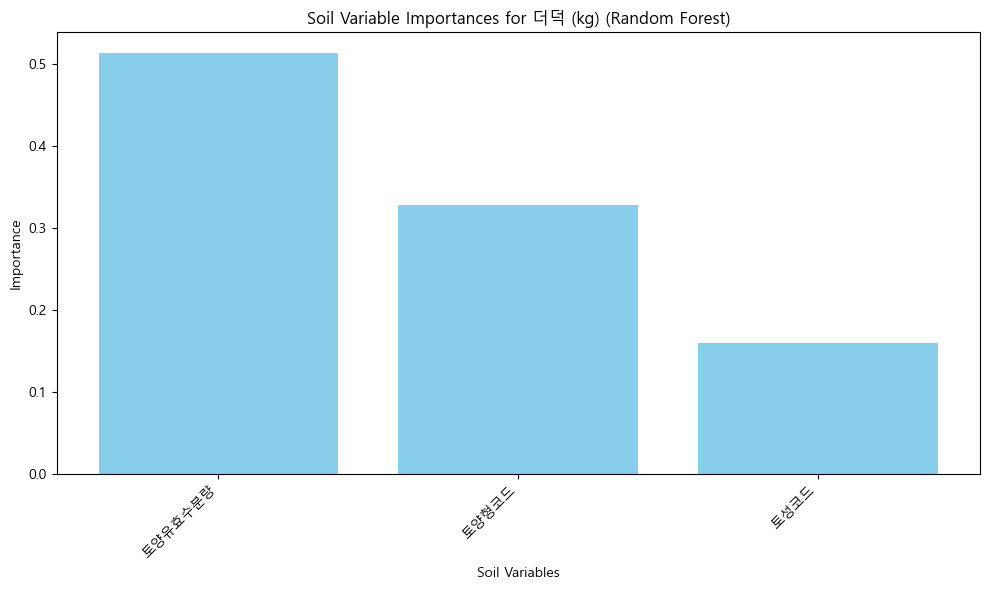

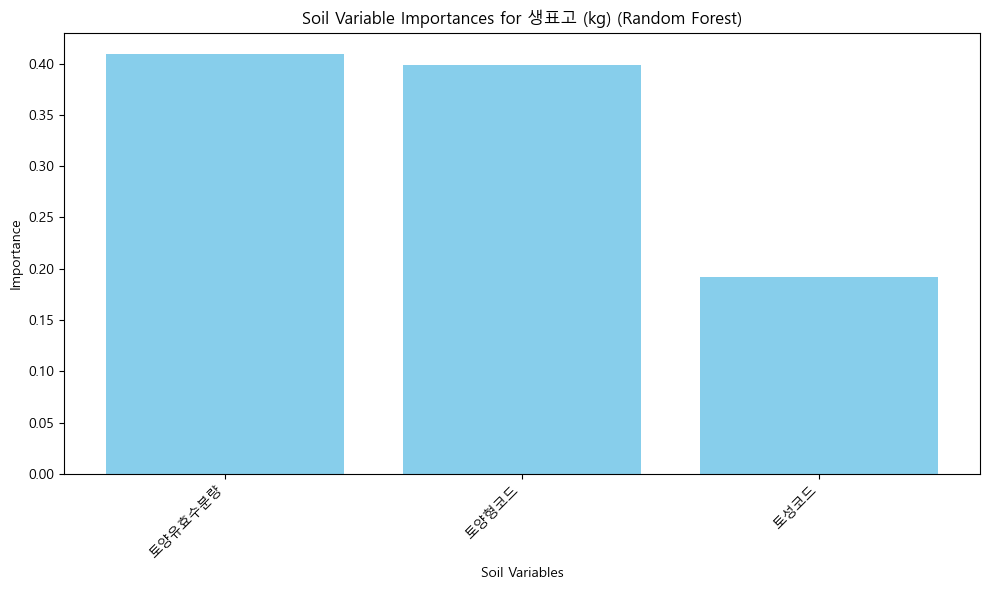

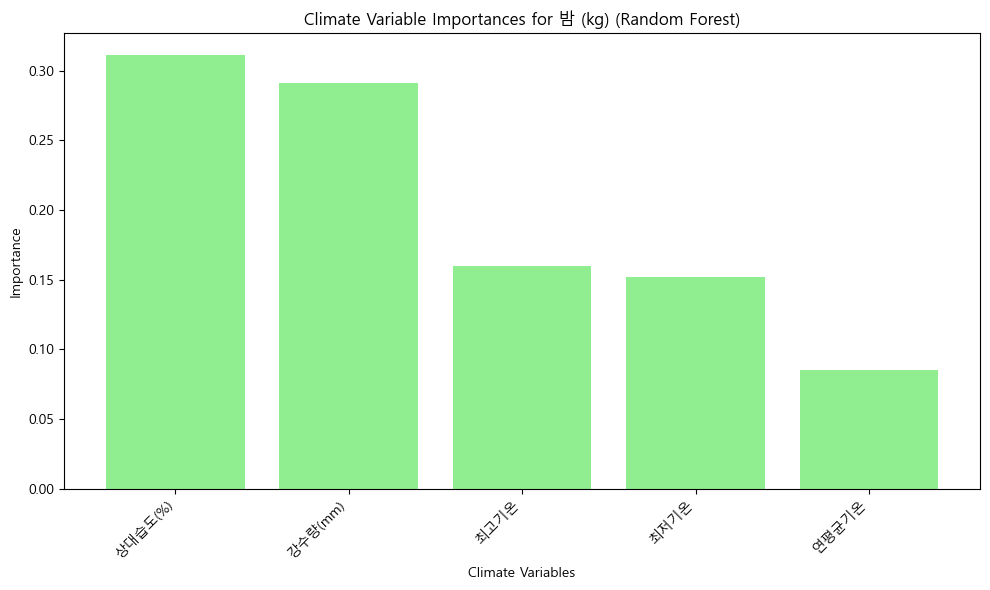

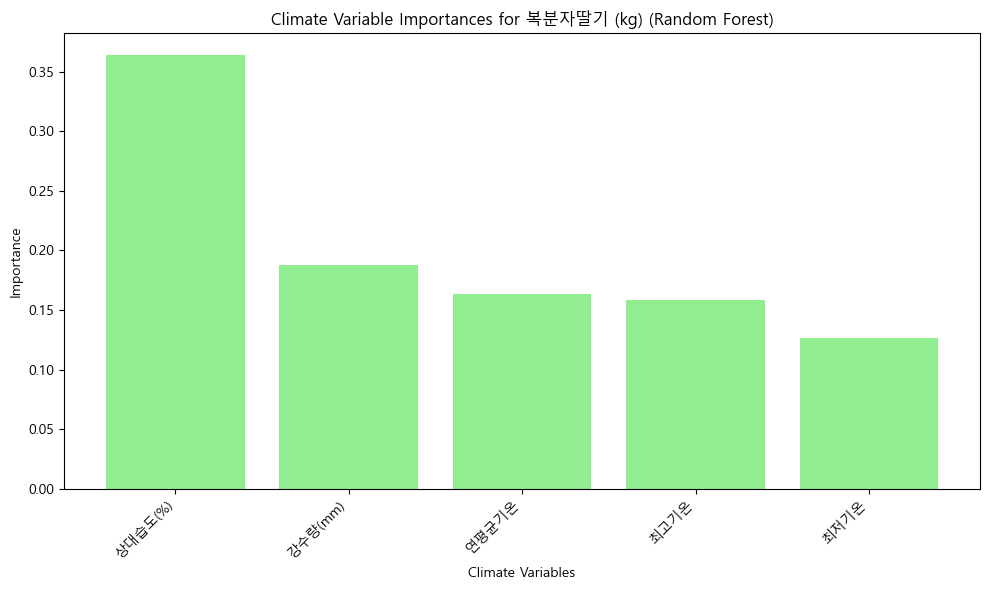

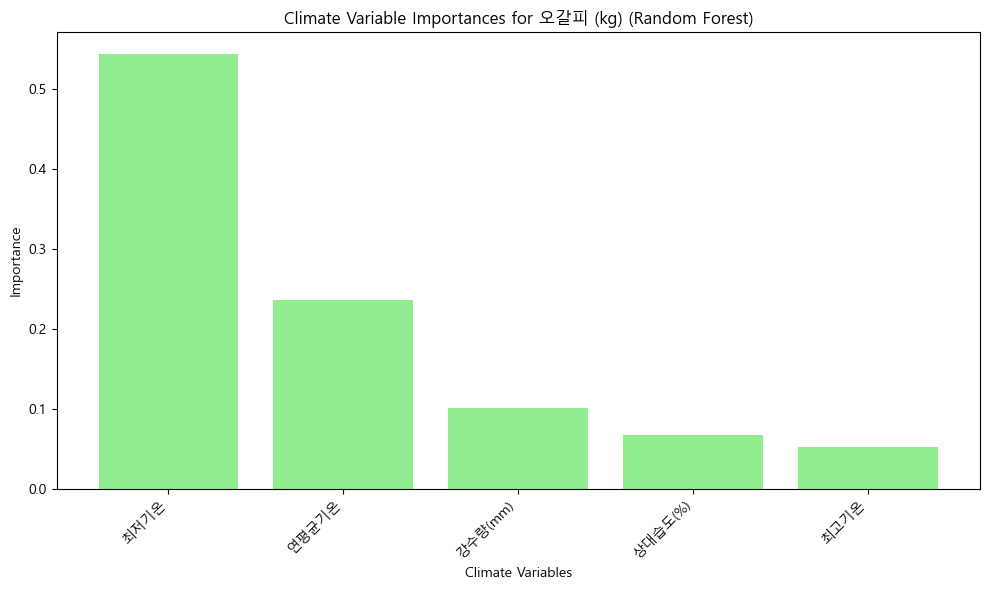

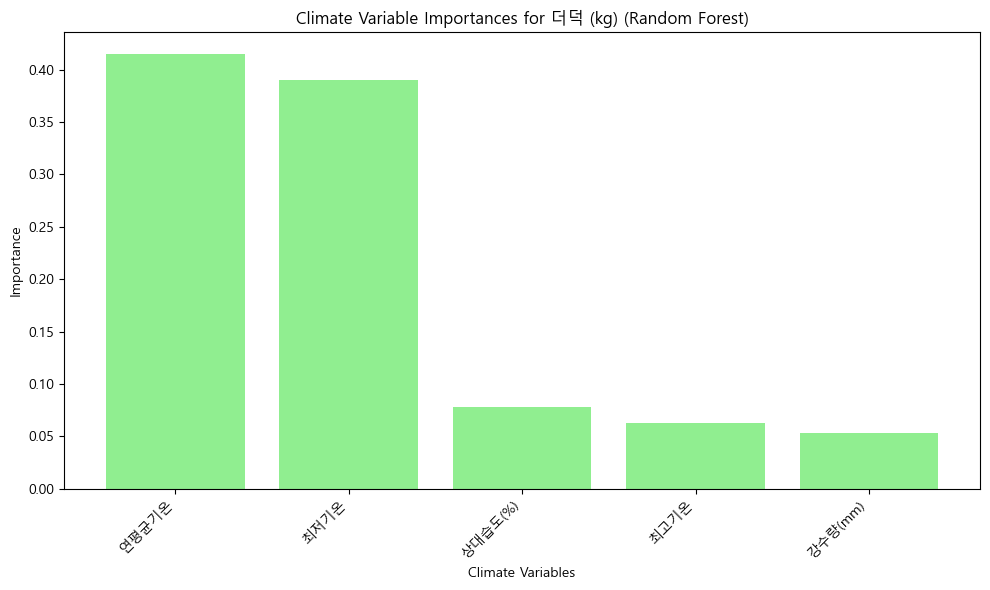

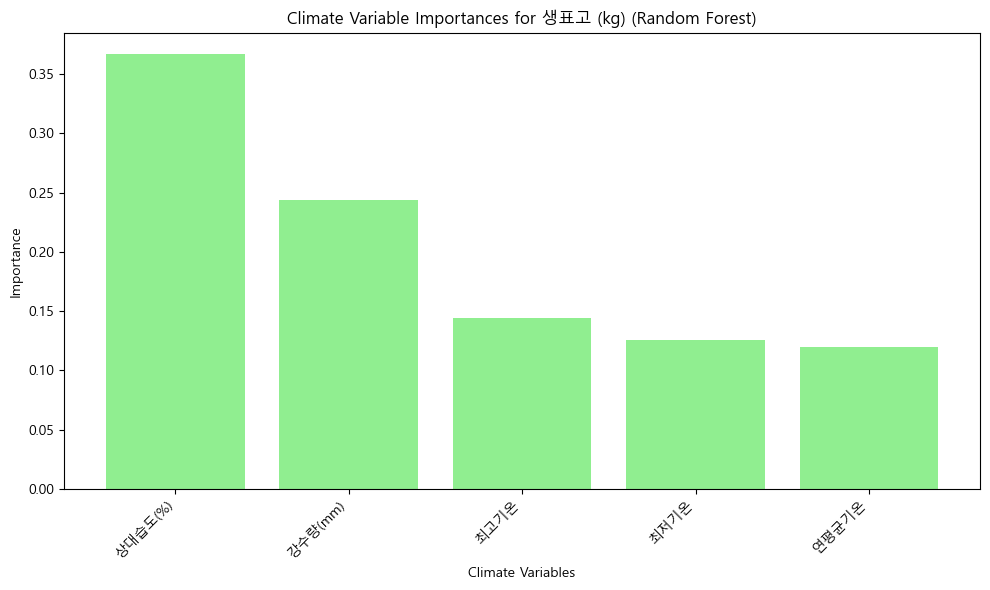

In [11]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Ensure data is loaded and processed
file_path = "C:/Users/com/Desktop/진짜임 이게 찐.csv"  # Update with your file path
data = pd.read_csv(file_path)

# Define soil and climate variables
soil_vars = ["토양형코드", "토성코드","토양유효수분량"]
climate_vars = ["연평균기온", "최고기온", "최저기온", "상대습도(%)", "강수량(mm)"]
crops = ["밤 (kg)", "복분자딸기 (kg)", "오갈피 (kg)", "더덕 (kg)", "생표고 (kg)"]

# Initialize storage for results
rf_soil_results = {}
rf_climate_results = {}

# Random Forest Importance: Separate analysis for soil and climate variables
for crop in crops:
    # Prepare data for soil variables (convert to dummy variables)
    X_soil = pd.get_dummies(data[soil_vars], drop_first=True).fillna(0)
    y_soil = data[crop].fillna(data[crop].mean())

    # Prepare data for climate variables
    X_climate = data[climate_vars].fillna(data[climate_vars].mean())
    y_climate = data[crop].fillna(data[crop].mean())

    # Fit Random Forest for soil variables
    rf_model_soil = RandomForestRegressor(random_state=42, n_estimators=100)
    rf_model_soil.fit(X_soil, y_soil)
    soil_importances = dict(zip(X_soil.columns, rf_model_soil.feature_importances_))
    rf_soil_results[crop] = soil_importances

    # Fit Random Forest for climate variables
    rf_model_climate = RandomForestRegressor(random_state=42, n_estimators=100)
    rf_model_climate.fit(X_climate, y_climate)
    climate_importances = dict(zip(X_climate.columns, rf_model_climate.feature_importances_))
    rf_climate_results[crop] = climate_importances

# Visualize Random Forest Feature Importances for Soil Variables
for crop, importances in rf_soil_results.items():
    sorted_importances = dict(sorted(importances.items(), key=lambda item: item[1], reverse=True))
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_importances.keys(), sorted_importances.values(), color='skyblue')
    plt.title(f'Soil Variable Importances for {crop} (Random Forest)')
    plt.ylabel('Importance')
    plt.xlabel('Soil Variables')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Visualize Random Forest Feature Importances for Climate Variables
for crop, importances in rf_climate_results.items():
    sorted_importances = dict(sorted(importances.items(), key=lambda item: item[1], reverse=True))
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_importances.keys(), sorted_importances.values(), color='lightgreen')
    plt.title(f'Climate Variable Importances for {crop} (Random Forest)')
    plt.ylabel('Importance')
    plt.xlabel('Climate Variables')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

